In [14]:
!pip install pandas_datareader
!pip install yfinance

  Using cached yfinance-0.2.40-py2.py3-none-any.whl.metadata (11 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached frozendict-2.4.4-py311-none-any.whl.metadata (23 kB)
  Using cached peewee-3.17.5-py3-none-any.whl
  Using cached html5lib-1.1-py2.py3-none-any.whl.metadata (16 kB)
Using cached yfinance-0.2.40-py2.py3-none-any.whl (73 kB)
Using cached frozendict-2.4.4-py311-none-any.whl (16 kB)
Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [7]:
start = "2010-01-01"
end = "2019-12-31"

# df = data.DataReader('AAPL', 'yahoo', start, end)
df = yf.download('AAPL', start=start, end=end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461977,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473148,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370185,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358407,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400680,447610800


In [8]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,68.988739,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.054337,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.424400,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.397690,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,70.815491,144114400


In [9]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461977,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473148,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370185,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358407,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400680,447610800


In [10]:
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


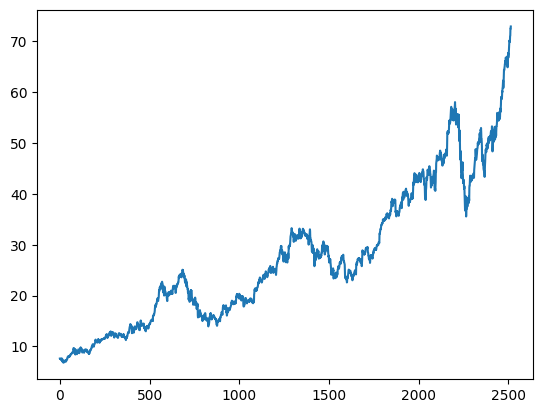

In [11]:
plt.plot(df.Close)

In [12]:
## Moving average 100
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

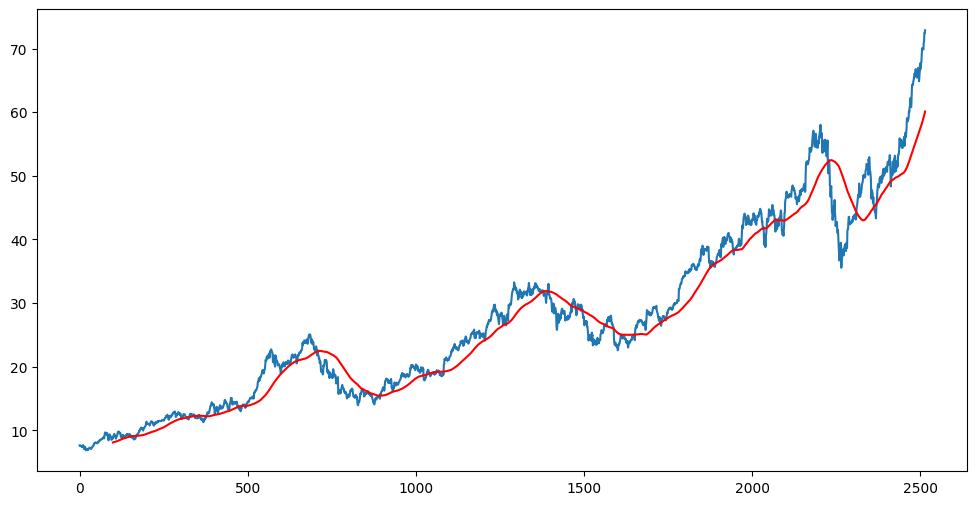

In [52]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [53]:
## Moving average 200
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

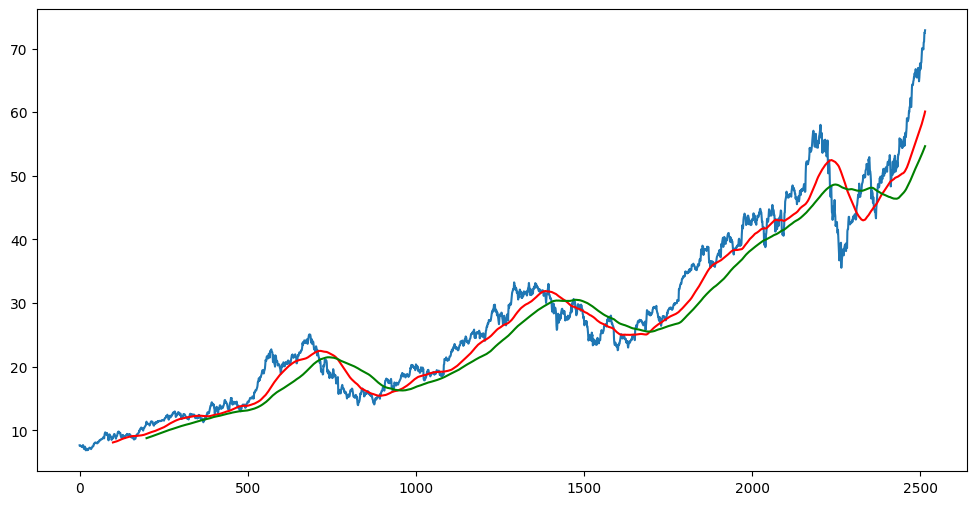

In [15]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [25]:
df.shape

(2515, 5)

In [16]:
## Splitting Data into training and testing

data_training = pd.DataFrame(df['Close'][:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [54]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [55]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [57]:
## Scaling down the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [58]:
data_train_array = scaler.fit_transform(data_training)
data_train_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [59]:
x_train = []
y_train = []

## taking previous 100 prices as the feature array and the class for that is the next day price
##----##
for i in range(100, data_train_array.shape[0]):
    x_train.append(data_train_array[i-100: i])
    y_train.append(data_train_array[i])

x_train, y_train = np.array(x_train), np.array(y_train)

In [47]:
!pip install tensorflow

  Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
  Using cached tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.5.tar.gz (26 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached ml_dtypes-0.3.2-cp311-cp311-win_amd64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.64.1-cp311-cp311-win_amd64.whl.metadata (3.4 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl

In [22]:
## ML Model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [23]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [60]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
model.compile(optimizer= 'adam', loss= 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 104ms/step - loss: 0.1397
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - loss: 0.0150
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - loss: 0.0114
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - loss: 0.0101
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - loss: 0.0092
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - loss: 0.0084
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - loss: 0.0093
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - loss: 0.0076
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - loss: 0.0075
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - loss: 0.0080
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - loss: 0.0070
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0073
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 0.0068
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - loss: 0.0063
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - lo

In [64]:
model.save('keras_model.keras')

In [65]:
past_100_days = data_training.tail(100)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [66]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [67]:
input_data.shape

(855, 1)

In [68]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i])

In [70]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755, 1)


In [71]:
# Making Predictions

y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step


In [72]:
y_predicted.shape

(755, 1)

In [73]:
y_test

array([[0.0721907 ],
       [0.06736028],
       [0.06911197],
       [0.06842189],
       [0.07155371],
       [0.07845431],
       [0.08418707],
       [0.08482406],
       [0.08822126],
       [0.08556719],
       [0.08445249],
       [0.0895483 ],
       [0.0894952 ],
       [0.0883805 ],
       [0.0895483 ],
       [0.08997296],
       [0.08938906],
       [0.09952758],
       [0.0998461 ],
       [0.09989915],
       [0.09820055],
       [0.09671427],
       [0.1359945 ],
       [0.1348267 ],
       [0.1377462 ],
       [0.144169  ],
       [0.15075112],
       [0.15345824],
       [0.15547536],
       [0.1538829 ],
       [0.16009341],
       [0.16927655],
       [0.17187748],
       [0.17102824],
       [0.17299223],
       [0.17819418],
       [0.18037053],
       [0.1772918 ],
       [0.17798189],
       [0.17941503],
       [0.17973358],
       [0.1945963 ],
       [0.19019062],
       [0.19454325],
       [0.19220766],
       [0.19316316],
       [0.19040291],
       [0.188

In [74]:
y_predicted

array([[0.14914276],
       [0.15009974],
       [0.15099967],
       [0.15181875],
       [0.15253794],
       [0.15314345],
       [0.1536322 ],
       [0.15402219],
       [0.15433899],
       [0.15461165],
       [0.15486436],
       [0.15511414],
       [0.15537457],
       [0.15565974],
       [0.15597595],
       [0.15632576],
       [0.15670812],
       [0.1571189 ],
       [0.15756291],
       [0.15805274],
       [0.15859595],
       [0.15919346],
       [0.1598365 ],
       [0.16056728],
       [0.1614353 ],
       [0.16249675],
       [0.16379996],
       [0.16533452],
       [0.16712016],
       [0.16917197],
       [0.17148192],
       [0.17403072],
       [0.17680342],
       [0.17971505],
       [0.1826832 ],
       [0.18567613],
       [0.18871629],
       [0.19181144],
       [0.19495751],
       [0.1981372 ],
       [0.20132662],
       [0.20449314],
       [0.20760919],
       [0.21064694],
       [0.2135827 ],
       [0.21639292],
       [0.21905845],
       [0.221

In [45]:
# Again Scale them Up
## Scaling down factor
scaler.scale_

array([0.02123255])

In [46]:
scale_factor = 1/0.02123255
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

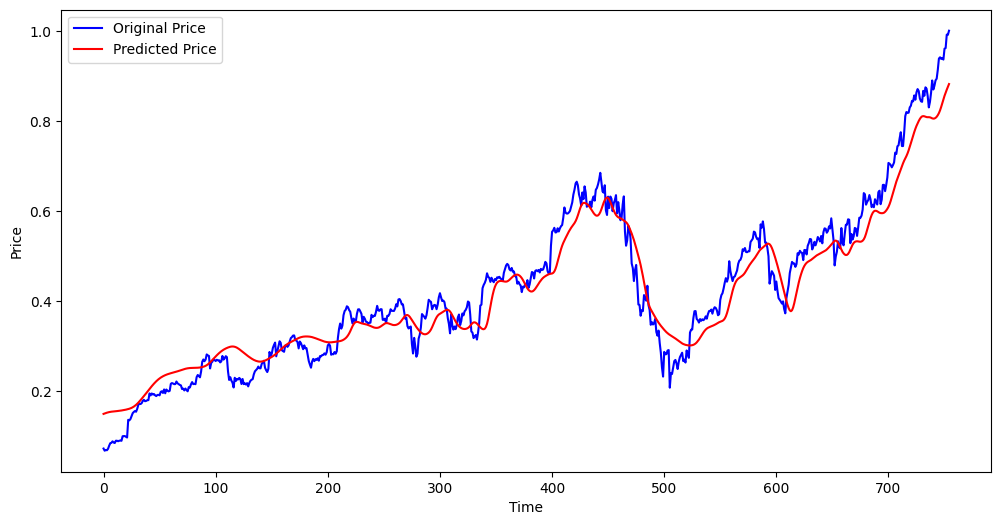

In [75]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()